In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


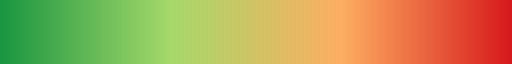

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire'
subfolder = glob.glob(cwd + '/**quinine**')
subfolder.sort()
# subfolder_Abs = glob.glob(cwd + '/quinine**Abs**')
# subfolder_Abs.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line
# print(*subfolder_Abs, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/0p1mM_quinine_050mM_H2SO4
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/0p2mM_quinine_050mM_H2SO4
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/0p5mM_quinine_050mM_H2SO4


# Flurorescence (PL)

## Read PL data into pandas dataframe

In [6]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df = pd.DataFrame()
quinine_con = ['1E-4M', '2E-4M', '5E-4M']
integrate_time = ['200ms', '300ms']

for i in range(len(subfolder)):
    for j in range(len(integrate_time)):
        # data_files = subfolder
        data_files = glob.glob(subfolder[i] + f'/**{integrate_time[j]}_Subt**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = quinine_con[i] + '_' + integrate_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df[f'x_{suffix}'] = df_int['Wavelength']
        df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [7]:
df

,x_1E-4M_200ms,1E-4M_200ms_mean,x_1E-4M_300ms,1E-4M_300ms_mean,x_2E-4M_200ms,2E-4M_200ms_mean,x_2E-4M_300ms,2E-4M_300ms_mean,x_5E-4M_200ms,5E-4M_200ms_mean,x_5E-4M_300ms,5E-4M_300ms_mean
0,197.742,0.222222,197.742,0.251111,197.742,0.202222,197.742,0.282222,197.742,0.360000,197.742,0.217778
1,198.544,0.288889,198.544,0.366667,198.544,0.361111,198.544,0.578889,198.544,0.725556,198.544,0.823333
2,199.347,0.017778,199.347,0.561111,199.347,0.261111,199.347,0.871111,199.347,0.677778,199.347,1.310000
3,200.149,0.183333,200.149,0.545556,200.149,0.446667,200.149,0.868889,200.149,1.008889,200.149,1.596667
4,200.951,0.212222,200.951,0.616667,200.951,0.426667,200.951,1.101111,200.951,1.246667,200.951,2.110000
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,0.035556,990.770,0.116667,990.770,0.251111,990.770,-0.087778,990.770,0.011111,990.770,-0.083333
1040,991.489,0.150000,991.489,-0.038889,991.489,0.380000,991.489,-0.156667,991.489,0.148889,991.489,-0.167778
1041,992.208,0.061111,992.208,0.070000,992.208,0.198889,992.208,-0.092222,992.208,0.064444,992.208,-0.107778
1042,992.928,-0.148889,992.928,-0.100000,992.928,-0.066667,992.928,-0.223333,992.928,-0.266667,992.928,-0.218889


## Check data in pd dataframe

In [8]:
df.keys()

Index(['x_1E-4M_200ms', '1E-4M_200ms_mean', 'x_1E-4M_300ms',
       '1E-4M_300ms_mean', 'x_2E-4M_200ms', '2E-4M_200ms_mean',
       'x_2E-4M_300ms', '2E-4M_300ms_mean', 'x_5E-4M_200ms',
       '5E-4M_200ms_mean', 'x_5E-4M_300ms', '5E-4M_300ms_mean'],
      dtype='object')

In [9]:
df.shape

(1044, 12)

## Prepare keys for average scans in pd dataframe

In [10]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_1E-4M_200ms',
 '1E-4M_200ms_mean',
 'x_1E-4M_300ms',
 '1E-4M_300ms_mean',
 'x_2E-4M_200ms',
 '2E-4M_200ms_mean',
 'x_2E-4M_300ms',
 '2E-4M_300ms_mean',
 'x_5E-4M_200ms',
 '5E-4M_200ms_mean',
 'x_5E-4M_300ms',
 '5E-4M_300ms_mean']

In [11]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label2 = ['200ms', '300ms']
         # 'ZnI2 128 uL/min']

1E-4M_200ms_mean
1E-4M_300ms_mean
2E-4M_200ms_mean
2E-4M_300ms_mean
5E-4M_200ms_mean
5E-4M_300ms_mean


## Plot PL scans together

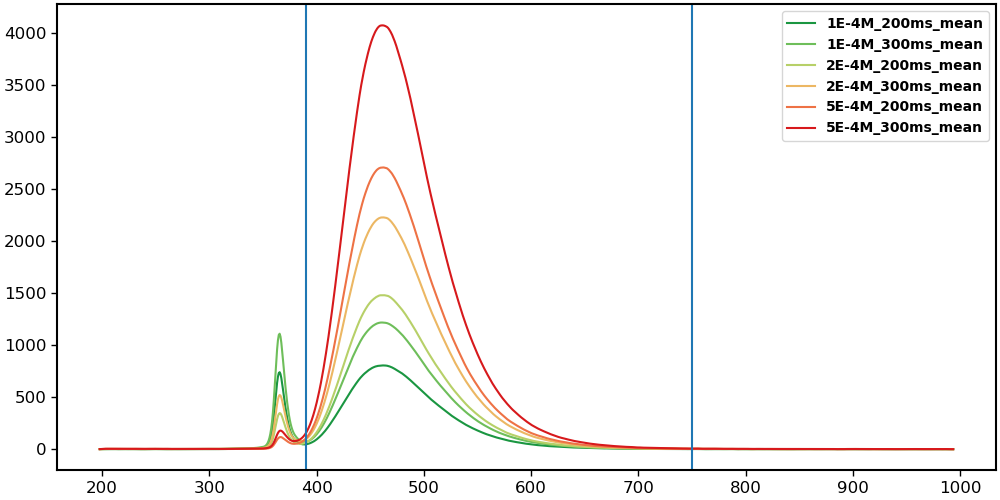

In [12]:
f1, ax1 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

ax1.axvline(w0)
ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [13]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [14]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

,Data_source,Simpson_integrate
0,1E-4M_200ms_mean,82308.944477
1,1E-4M_300ms_mean,124653.040296
2,2E-4M_200ms_mean,151127.098835
3,2E-4M_300ms_mean,227533.964203
4,5E-4M_200ms_mean,276894.100505
5,5E-4M_300ms_mean,416714.536734


## Save Simpson integrate of PL peak

In [15]:
# df_int.to_csv(os.path.join(new_dir, 'simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [16]:
# df_int.to_csv('050mM_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [17]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
quinine_con = ['1E-4M', '2E-4M', '5E-4M']
integrate_time = ['200ms', '300ms']

for i in range(len(subfolder)):
    for j in range(len(integrate_time)):
        # data_files = subfolder
        data_files = glob.glob(subfolder[i] + f'/**{integrate_time[j]}_Absorbance**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = quinine_con[i] + '_' + integrate_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df2[f'x_{suffix}'] = df_int['Wavelength']
        df2[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [18]:
df2

,x_1E-4M_200ms,1E-4M_200ms_mean,x_1E-4M_300ms,1E-4M_300ms_mean,x_2E-4M_200ms,2E-4M_200ms_mean,x_2E-4M_300ms,2E-4M_300ms_mean,x_5E-4M_200ms,5E-4M_200ms_mean,x_5E-4M_300ms,5E-4M_300ms_mean
0,197.742,0.170000,197.742,0.185556,197.742,0.017778,197.742,0.015556,197.742,-0.995556,197.742,-3.170000
1,198.544,0.262222,198.544,0.275556,198.544,0.237778,198.544,0.245556,198.544,0.124444,198.544,0.000000
2,199.347,0.260000,199.347,0.277778,199.347,0.230000,199.347,0.244444,199.347,0.060000,199.347,0.000000
3,200.149,0.262222,200.149,0.280000,200.149,0.233333,200.149,0.246667,200.149,0.043333,200.149,0.000000
4,200.951,0.260000,200.951,0.280000,200.951,0.235556,200.951,0.250000,200.951,0.030000,200.951,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,0.190000,990.770,0.170000,990.770,0.020000,990.770,0.000000,990.770,-0.290000,990.770,-0.151111
1040,991.489,0.190000,991.489,0.170000,991.489,0.020000,991.489,0.000000,991.489,-0.290000,991.489,-0.160000
1041,992.208,0.190000,992.208,0.170000,992.208,0.020000,992.208,0.000000,992.208,-0.290000,992.208,-0.180000
1042,992.928,0.190000,992.928,0.172222,992.928,0.020000,992.928,0.000000,992.928,-0.290000,992.928,-0.240000


## Prepare keys for average scans in pd dataframe

In [19]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_1E-4M_200ms',
 '1E-4M_200ms_mean',
 'x_1E-4M_300ms',
 '1E-4M_300ms_mean',
 'x_2E-4M_200ms',
 '2E-4M_200ms_mean',
 'x_2E-4M_300ms',
 '2E-4M_300ms_mean',
 'x_5E-4M_200ms',
 '5E-4M_200ms_mean',
 'x_5E-4M_300ms',
 '5E-4M_300ms_mean']

In [20]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label2 = ['200ms', '300ms']
         # 'ZnI2 128 uL/min']

1E-4M_200ms_mean
1E-4M_300ms_mean
2E-4M_200ms_mean
2E-4M_300ms_mean
5E-4M_200ms_mean
5E-4M_300ms_mean


## Plot Abs scans together

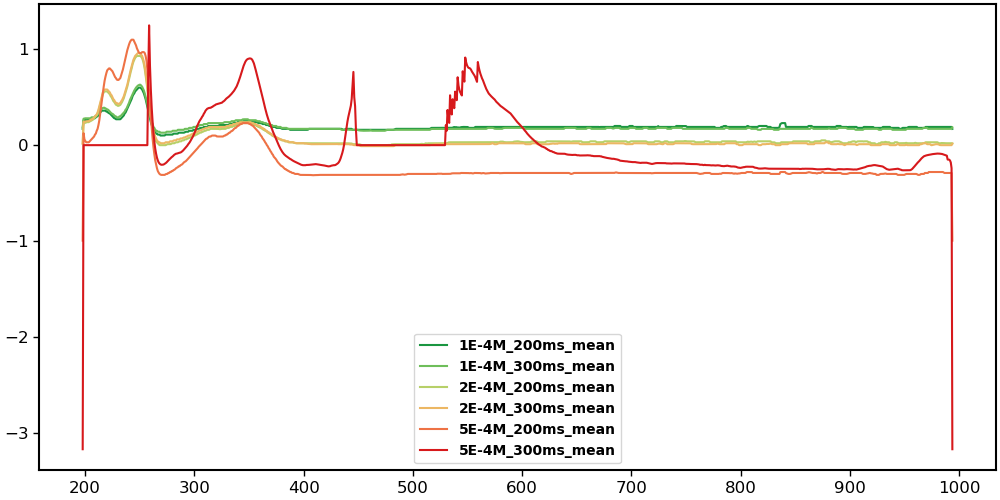

In [21]:
f2, ax2 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [22]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (x[idx1]-x[idx0])/(y[idx1]-y[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


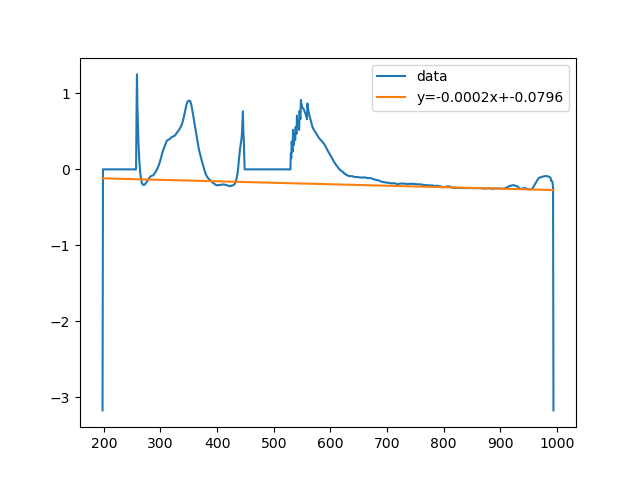

In [23]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[800, 810]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[800, 910])

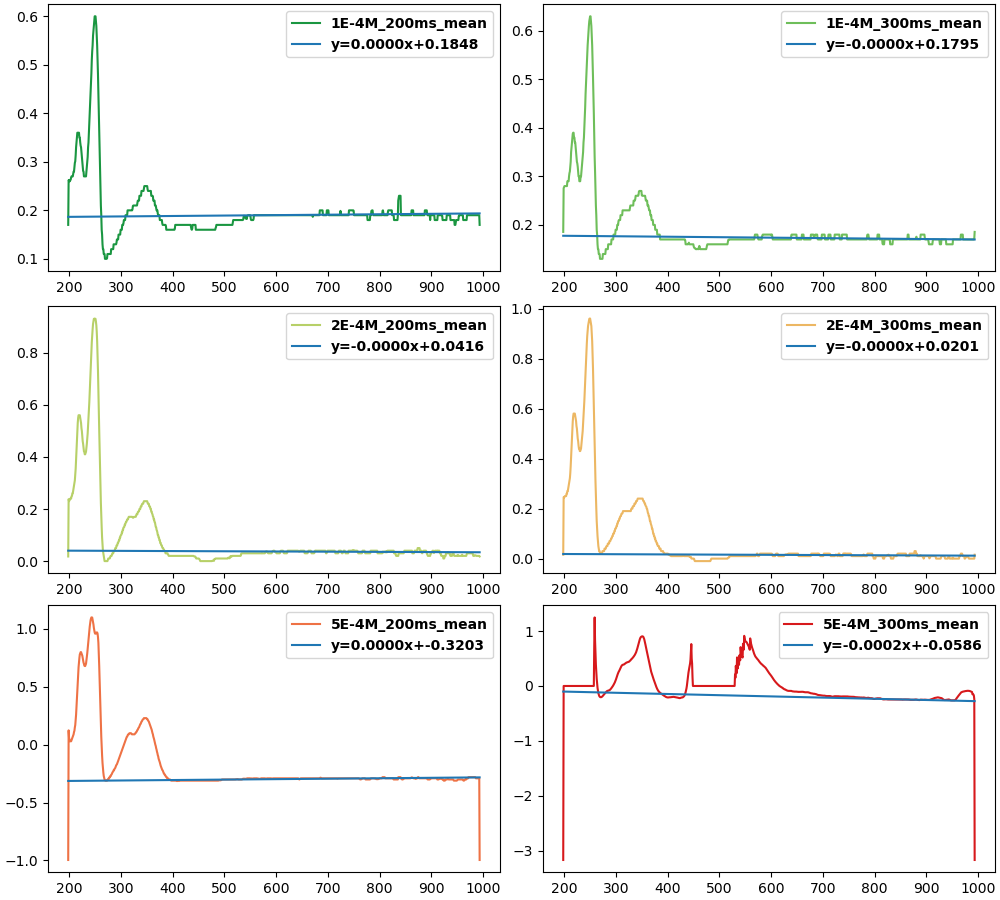

In [24]:
rows = 3
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (10, 9), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[700, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    x = df2[keys_list2[i*2]]
    y = df2[keys_list2[i*2+1]]
    popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[i], plot=False)
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
    ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
    
    df4[keys_list2[i*2]] = x
    # df4[keys_list2[i*2+1]] = y - popt[1]
    df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

## Plot Abs by offset

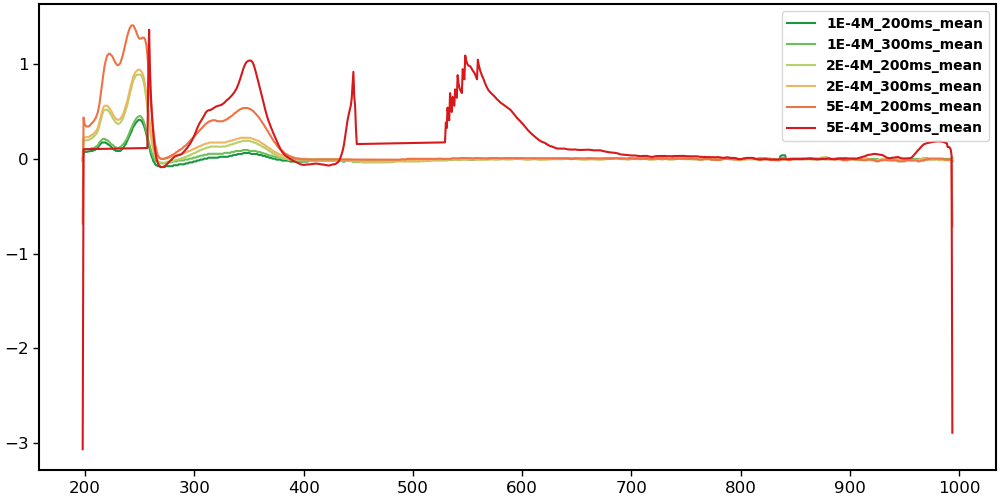

In [25]:
f4, ax4 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [26]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_1E-4M_200ms',
 '1E-4M_200ms_mean',
 'x_1E-4M_300ms',
 '1E-4M_300ms_mean',
 'x_2E-4M_200ms',
 '2E-4M_200ms_mean',
 'x_2E-4M_300ms',
 '2E-4M_300ms_mean',
 'x_5E-4M_200ms',
 '5E-4M_200ms_mean',
 'x_5E-4M_300ms',
 '5E-4M_300ms_mean']

## Save offset data as csv

In [27]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

1E-4M_200ms_mean_offset.csv
1E-4M_300ms_mean_offset.csv
2E-4M_200ms_mean_offset.csv
2E-4M_300ms_mean_offset.csv
5E-4M_200ms_mean_offset.csv
5E-4M_300ms_mean_offset.csv


## Save Absorbance at 365 nm

In [28]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,1E-4M_200ms_mean,0.220000,0.031947
1,1E-4M_300ms_mean,0.230000,0.054030
2,2E-4M_200ms_mean,0.150000,0.111201
3,2E-4M_300ms_mean,0.160000,0.142971
4,5E-4M_200ms_mean,0.030000,0.336262
5,5E-4M_300ms_mean,0.385556,0.523968


In [29]:
# df_365.to_csv(os.path.join(new_dir, 'abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [30]:
# df_365.to_csv('050mM_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [31]:
df2.keys()

Index(['x_1E-4M_200ms', '1E-4M_200ms_mean', 'x_1E-4M_300ms',
       '1E-4M_300ms_mean', 'x_2E-4M_200ms', '2E-4M_200ms_mean',
       'x_2E-4M_300ms', '2E-4M_300ms_mean', 'x_5E-4M_200ms',
       '5E-4M_200ms_mean', 'x_5E-4M_300ms', '5E-4M_300ms_mean'],
      dtype='object')

## Export quinine 2E-4M of 200ms for PLQY_summary.ipynb

In [32]:
df_66 = pd.DataFrame()

df_66['Wavelength_01'] = df['x_2E-4M_200ms']
df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df_66.to_csv('20230822_quinine_2E-4M.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Compare dark and Ref saved in addtional scans

## Reading dark and reference

In [33]:
dark = glob.glob(cwd + '/Dark**.txt')
ref = glob.glob(cwd + '/**H2SO4**.txt')

dark.sort()
ref.sort()

# subfolder_Cl.reverse()
# del subfolder[-1]
print(*dark, sep = '\n')  ## Print one element per line
print(*ref, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/Dark_200ms_QEP028751__0__00006.txt
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/Dark_300ms_QEP028751__0__00005.txt
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/Dark_400ms_QEP028751__0__00004.txt
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/050mM_H2SO4_200ms_QEP028751__0__00002.txt
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinine_sapphire/050mM_H2SO4_300ms_QEP028751__0__00001.txt
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230822_quinin

### Read raw Abs data into pandas dataframe

In [34]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df21 = pd.DataFrame()
quinine_con = ['1E-4M', '2E-4M', '5E-4M']
integrate_time = ['200ms', '300ms']

for i in range(len(subfolder)):
    for j in range(len(integrate_time)):
        # data_files = subfolder
        data_files = glob.glob(subfolder[i] + f'/**{integrate_time[j]}_Abs_QEP**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = quinine_con[i] + '_' + integrate_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df21[f'x_{suffix}'] = df_int['Wavelength']
        df21[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [35]:
df21

,x_1E-4M_200ms,1E-4M_200ms_mean,x_1E-4M_300ms,1E-4M_300ms_mean,x_2E-4M_200ms,2E-4M_200ms_mean,x_2E-4M_300ms,2E-4M_300ms_mean,x_5E-4M_200ms,5E-4M_200ms_mean,x_5E-4M_300ms,5E-4M_300ms_mean
0,197.742,-2.143333,197.742,-4.061111,197.742,-3.635556,197.742,-7.414444,197.742,-84.973333,197.742,-24915.011111
1,198.544,114.006667,198.544,171.137778,198.544,119.703333,198.544,184.552222,198.544,140.977778,198.544,-24584.808889
2,199.347,195.290000,199.347,293.731111,199.347,205.506667,199.347,317.574444,199.347,296.726667,199.347,-24357.993333
3,200.149,256.550000,200.149,386.213333,200.149,269.843333,200.149,417.261111,200.149,411.566667,200.149,-24190.754444
4,200.951,347.360000,200.951,524.297778,200.951,365.025556,200.951,565.624444,200.951,582.546667,200.951,-23940.678889
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,36256.747778,990.770,54378.427778,990.770,53040.005556,990.770,81584.301111,990.770,112206.284444,990.770,116876.992222
1040,991.489,27052.355556,991.489,40519.963333,991.489,39599.383333,991.489,60937.085556,991.489,83893.668889,991.489,88548.488889
1041,992.208,20950.085556,992.208,31335.098889,992.208,30665.864444,992.208,47210.998889,992.208,65013.138889,992.208,74407.717778
1042,992.928,12495.577778,992.928,18683.982222,992.928,18318.535556,992.928,28204.442222,992.928,38838.830000,992.928,54610.635556


## Calculate Absorbance from additional Dark & Ref

In [36]:
skiprows = 14
df3 = pd.DataFrame()
# id0 = 8
# id1 = 22
for t in ['200ms', '300ms']:
    for i in title:        
        for j in dark:
            for k in ref:
                if (t in i) and (t in j) and (t in k):
                    # print(t+'\n',i+'\n',os.path.basename(j)+'\n',os.path.basename(k)+'\n')
                    dark_df = pd.read_csv(j, skiprows=skiprows, sep='\t', names=['Wavelength', 'Sample'])
                    ref_df = pd.read_csv(k, skiprows=skiprows, sep='\t', names=['Wavelength', 'Sample'])
                    
                    # suffix = os.path.basename(subfolder_Abs[i])
                    suffix = i
                    df3[f'x_{suffix[0:-5]}'] = df21[f'x_{suffix[0:-5]}']
                    absorbance = -np.log10((df21[f'{suffix}']-dark_df['Sample'])/(ref_df['Sample']-dark_df['Sample']))
                    df3[f'{suffix}'] = absorbance

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df3

,x_1E-4M_200ms,1E-4M_200ms_mean,x_2E-4M_200ms,2E-4M_200ms_mean,x_5E-4M_200ms,5E-4M_200ms_mean,x_1E-4M_300ms,1E-4M_300ms_mean,x_2E-4M_300ms,2E-4M_300ms_mean,x_5E-4M_300ms,5E-4M_300ms_mean
0,197.742,0.156043,197.742,0.030045,197.742,-1.138058,197.742,0.177160,197.742,-0.007911,197.742,-3.419234
1,198.544,0.284211,198.544,0.262676,198.544,0.190547,198.544,0.281262,198.544,0.248059,198.544,NaN
2,199.347,0.282471,199.347,0.260152,199.347,0.099608,199.347,0.279722,199.347,0.245564,199.347,NaN
3,200.149,0.282334,200.149,0.260245,200.149,0.075924,200.149,0.280085,200.149,0.246271,200.149,NaN
4,200.951,0.282137,200.951,0.260598,200.951,0.057622,200.951,0.280260,200.951,0.247218,200.951,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,0.176174,990.770,0.010956,990.770,-0.314461,990.770,0.173928,990.770,-0.002259,990.770,-0.158386
1040,991.489,0.176023,991.489,0.010539,991.489,-0.315501,991.489,0.174488,991.489,-0.002730,991.489,-0.165032
1041,992.208,0.175284,992.208,0.009818,992.208,-0.316523,992.208,0.174389,992.208,-0.003626,992.208,-0.201203
1042,992.928,0.174836,992.928,0.008714,992.928,-0.317647,992.928,0.174032,992.928,-0.004813,992.928,-0.291769


In [38]:
title

['1E-4M_200ms_mean',
 '1E-4M_300ms_mean',
 '2E-4M_200ms_mean',
 '2E-4M_300ms_mean',
 '5E-4M_200ms_mean',
 '5E-4M_300ms_mean']

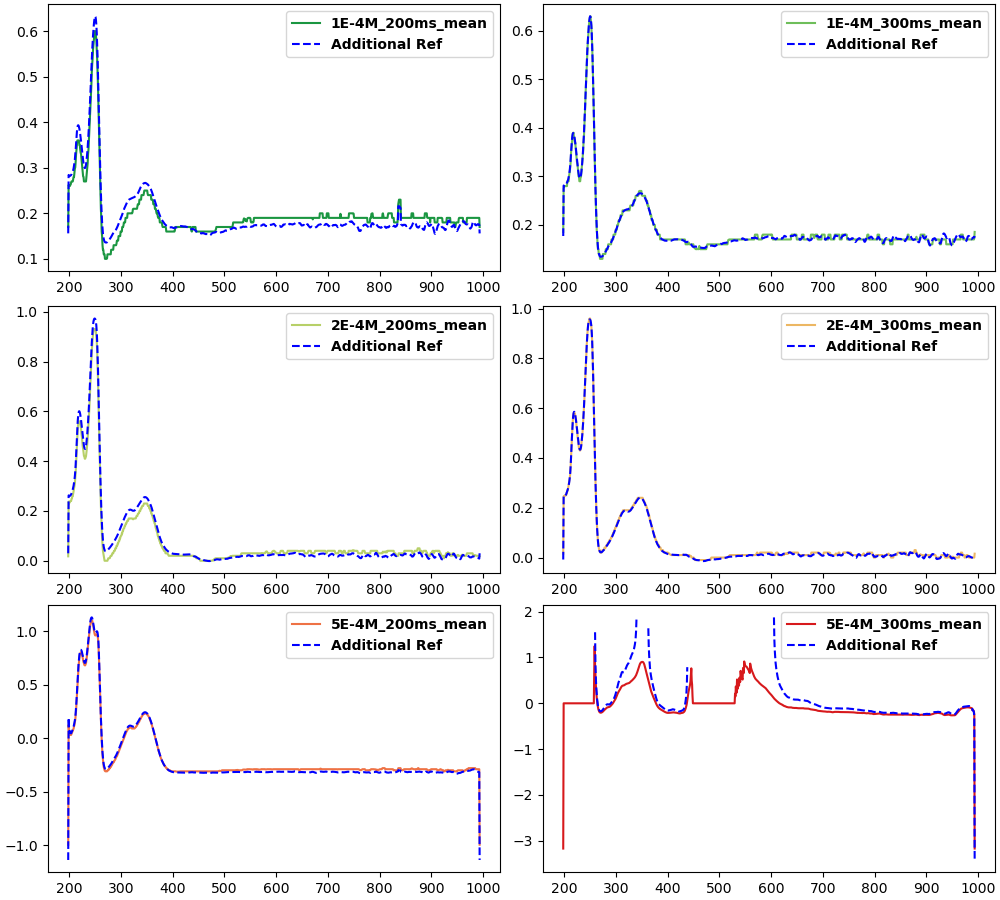

In [39]:
rows = 3
cols = 2
f31, ax31 = plt.subplots(rows, cols, figsize = (10, 9), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22

legend_properties = {'weight':'bold', 'size':10} 
for i in range(len(title)):
    # ax31.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    ax31[idx_ax[0][0], idx_ax[0][1]].plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
    ax31[idx_ax[0][0], idx_ax[0][1]].plot(df3[keys_list2[i*2]], df3[keys_list2[i*2+1]], 'b--', label='Additional Ref')

    ax31[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)

# ax31.set_xlim(-0.5, 20)
# ax31.set_ylim(2500, 9500)
# ax31.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax31.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax31.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax31.spines["bottom"].set_linewidth(spinewidth)
# ax31.spines["right"].set_linewidth(spinewidth)
# ax31.spines["top"].set_linewidth(spinewidth)
# ax31.spines["left"].set_linewidth(spinewidth)